In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Neural Networks

In [25]:
X = np.array([3,14])
W = np.array([[1,0,-1],
              [0,1,-1],
              [-1,0,-1],
              [0,-1,-1]])
V = np.array([[1,1,1,1,0],[-1,-1,-1,-1,2]])


Z = W[:,:-1]@X + W[:,-1]
fZ = np.maximum(0,Z)
U = V[:,:-1]@fZ + V[:,-1]
fU = np.maximum(0,U)
out = np.exp(fU)/np.sum(np.exp(fU))

In [26]:
Z, fZ, U, fU, out

(array([  2,  13,  -4, -15]),
 array([ 2, 13,  0,  0]),
 array([ 15, -13]),
 array([15,  0]),
 array([9.99999694e-01, 3.05902227e-07]))

### Decision Boundaries

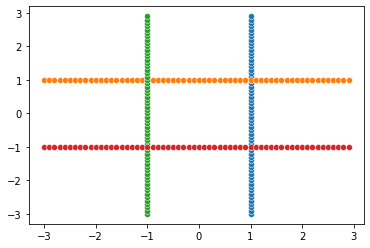

In [44]:
px=np.arange(-3,3,0.1)
sns.scatterplot(x=1, y=px)
sns.scatterplot(x=px, y=1)
sns.scatterplot(x=-1, y=px)
sns.scatterplot(x=px, y=-1)
plt.show()

### Output of Neural Network

In [46]:
v1s= [1,0,3]

for v1 in v1s:
    v2 = -1*v1 +2
    U  = np.array([v1,v2])
    fU = np.maximum(0,U)
    print(fU)
    print(np.exp(fU)/np.sum(np.exp(fU)))

[1 1]
[0.5 0.5]
[0 2]
[0.11920292 0.88079708]
[3 0]
[0.95257413 0.04742587]


### Inverse Temperature

In [55]:
(np.log(999/1000)-np.log(1/1000)), (np.log(999/1000)-np.log(1/1000))/3

(6.906754778648553, 2.302251592882851)

## 2. LSTM

In [64]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh_(x):
    return 1-(2/(np.exp(2*x)+1))

In [67]:
np.tanh(10)

True

In [73]:
X = [0,0,1,1,1,0]
c = [0]
h = [0]
for x in X:
    ft = sigmoid(0*h[-1]+0*x-100)
    it = sigmoid(0*h[-1]+100*x+100)
    ot = sigmoid(0*h[-1]+100*x)
    ct = ft*c[-1] + it*np.tanh(-100*h[-1]+50*x)
    c.append(ct)
    ht = ot*np.tanh(ct)
    h.append(ht)
h

[0,
 0.0,
 0.0,
 0.7615941559557649,
 -0.7615941559557649,
 0.7615941559557649,
 -0.3807970779778824]

In [74]:
X = [1, 1, 0, 1, 1]
c = [0]
h = [0]
for x in X:
    ft = sigmoid(0*h[-1]+0*x-100)
    it = sigmoid(0*h[-1]+100*x+100)
    ot = sigmoid(0*h[-1]+100*x)
    ct = ft*c[-1] + it*np.tanh(-100*h[-1]+50*x)
    c.append(ct)
    ht = ot*np.tanh(ct)
    h.append(ht)
h

[0,
 0.7615941559557649,
 -0.7615941559557649,
 0.3807970779778824,
 0.7615941559185755,
 -0.7615941559557649]

## 3. Backpropagation

In [77]:
def sigmoid_d(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

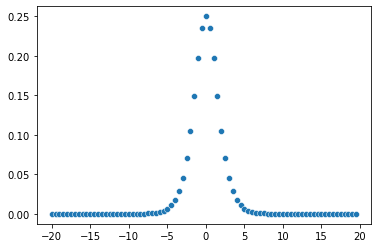

In [80]:
x=np.arange(-20,20,0.5)
y=  sigmoid_d(x)
sns.scatterplot(x=x,y=y)
plt.show()

### Simple Network

In [82]:
x=3
w1=0.01
w2=-5
b=-1

z1 = x*w1
a1 = np.maximum(0,z1)
z2 = w2*a1+b
y = sigmoid(z2)

t=1
C = 0.5*(y-t)**2
C

0.28842841648243966

In [90]:
# p C/p w1 , a1>0 -> p relu = 1
3*w2*1*sigmoid_d(z2)*(y-t)
# p C/p w2 , p z2/p w2 = a1
a1*sigmoid_d(z2)*(y-t)
# p C/p b, p z2/p b = 1
sigmoid_d(z2)*(y-t)

-0.13872777081136367

### SGD

-0.00416183312434091

-0.13872777081136367